<h1 style='font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

## O Dataset e o Projeto

#### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

O objetivo deste projeto será estimar um modelo de Machine Learning utilizando a técnica de Regressão Linear para demonstrar os impactos das variáveis disponibilizadas no dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).

Os dados (amostra) foram coletados em São Paulo - BR, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

#### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

In [1]:
# importando as bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# leitura do dataset
dados = pd.read_csv('Consumo_cerveja.csv', sep=';')

# <font color='red' style='font-size: 23px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

In [3]:
# visualizando as 10 primeiras linhas
dados.head(10)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
5,06/01/2015,23.78,20.1,30.5,12.2,0,28218
6,07/01/2015,24.00,19.5,33.7,0.0,0,29732
7,08/01/2015,24.90,19.5,32.8,48.6,0,28397
8,09/01/2015,28.20,21.9,34.0,4.4,0,24886
9,10/01/2015,26.76,22.1,34.2,0.0,1,37937


In [4]:
# visualizando o tamanho do dataset
dados.shape

(365, 7)

In [5]:
# estatísticas descritivas
dados.describe()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


In [6]:
# matriz de correlação
corr = dados.corr().round(4)
corr

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


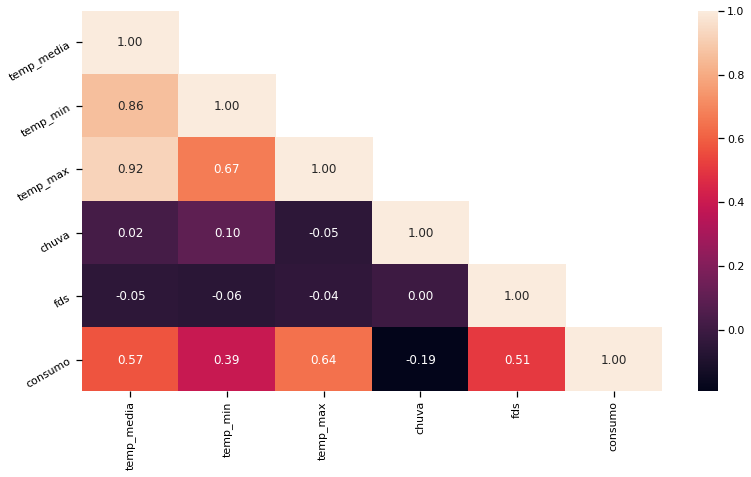

In [7]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

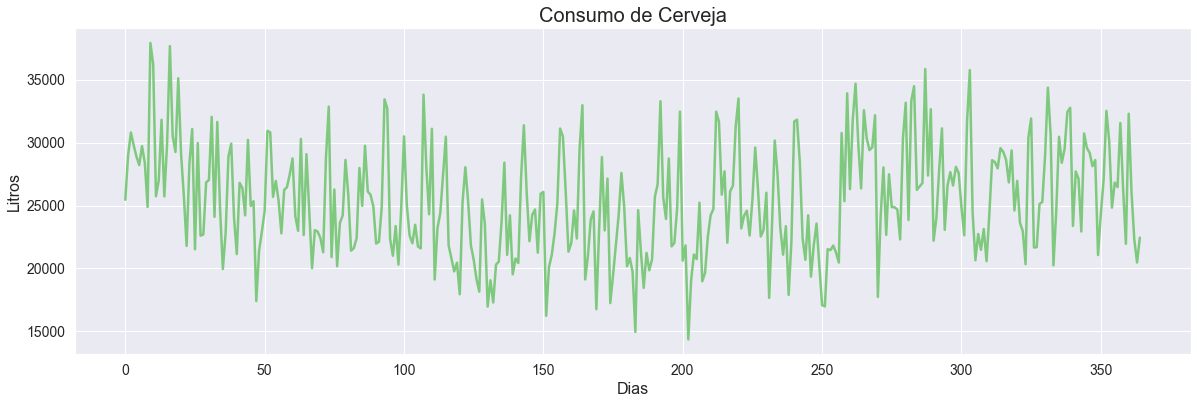

In [8]:
# comportamento da variável dependente (y)
sns.set_palette('Accent')
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

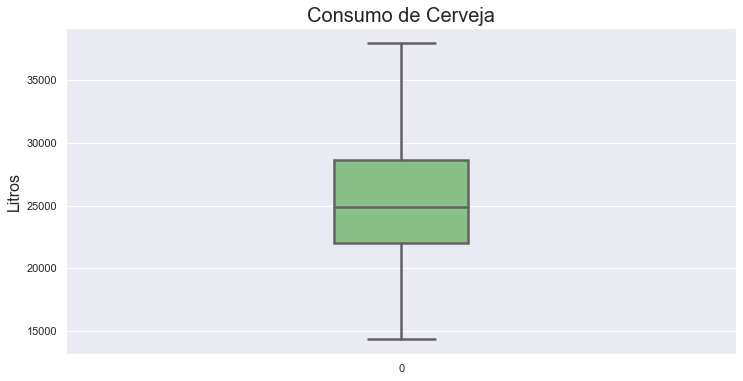

In [30]:
ax = sns.boxplot(data=dados['consumo'], width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax;

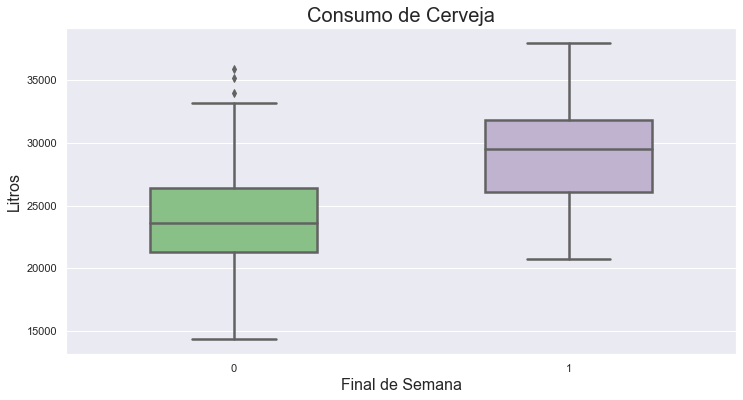

In [31]:
# investigando a variável dependente (y) segundo determinada característica
ax = sns.boxplot(x='fds', y='consumo', data=dados, width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_xlabel('Final de Semana', fontsize=16)
ax.set_ylabel('Litros', fontsize=16)
ax;

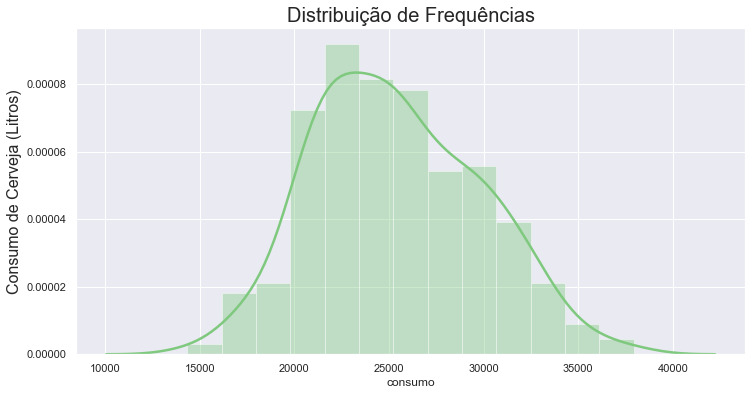

In [32]:
# distribuição de frequências da variável dependente (y)
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)
ax;

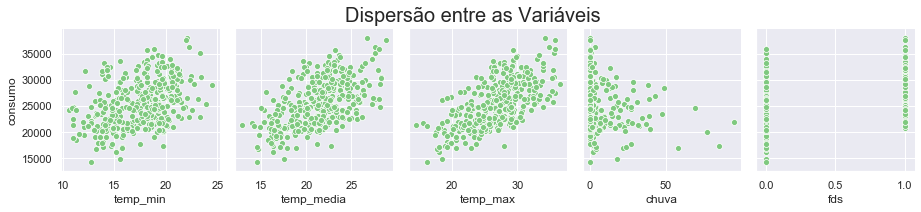

In [12]:
# variável dependente X variáveis explicativas (pairplot)
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.10)
plt.show()

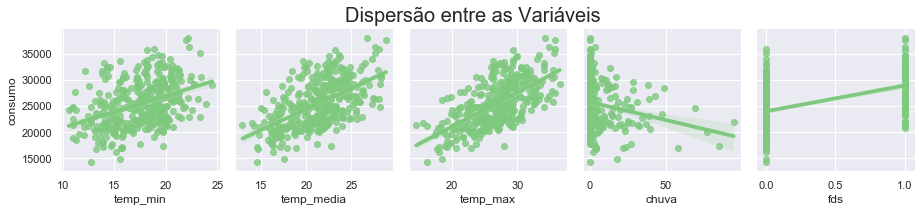

In [34]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.10)
ax;

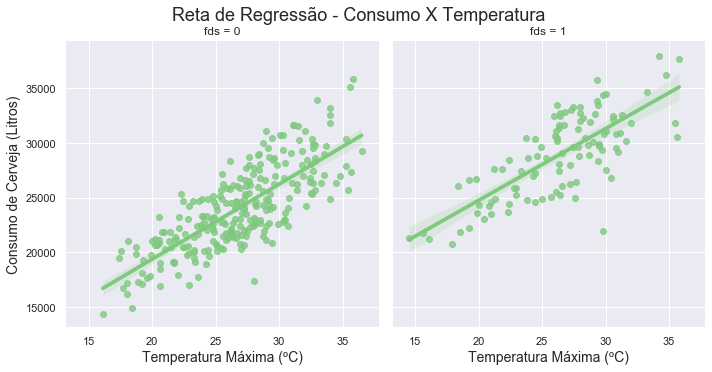

In [33]:
# plotando um lmplot utilizando uma terceira variável na análise
ax = sns.lmplot(data=dados, x='temp_max', y='consumo', col='fds')
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=18, y=1.02)
ax.set_xlabels('Temperatura Máxima (ºC)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=14)
ax;

# <font color='red' style='font-size: 23px;'>Estimando um Modelo de Regressão Linear para o Consumo
</font>
<hr style='border: 2px solid red;'>

In [15]:
# estimando um Modelo de Regressão Linear para o Consumo
y = dados['consumo']
X = dados[['temp_max', 'chuva', 'fds']]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [18]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape[0]}')
print(f'y_test: {y_test.shape[0]}')

X_train: (255, 3)
X_test: (110, 3)
y_train: 255
y_test: 110


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
# instanciando a classe LinearRegression()
modelo = LinearRegression()

In [21]:
# utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear 
# utilizando os dados de TREINO (y_train e X_train)
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO
print(f'R² = {(modelo.score(X_train, y_train).round(2))}')

R² = 0.73


In [23]:
# gerando previsões para os dados de TESTE (X_test)
y_previsto = modelo.predict(X_test)

In [24]:
# obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.69


# <font color='red' style='font-size: 23px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

In [25]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [26]:
modelo.predict(entrada)[0]

26094.901775262017

In [27]:
# criando um simulador simples
temp_max=40
chuva=0
fds= 1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros de cerveja'.format(modelo.predict(entrada)[0]))

38742.53 litros de cerveja


# <font color='red' style='font-size: 23px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [38]:
modelo.intercept_

5951.976339312445

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [39]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [40]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [41]:
index = ['Intercepto', 'Temperatura Máxima', 'Chuva(mm)', 'Final de Semana']

In [42]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva(mm),-60.782435
Final de Semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 23px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

In [28]:
y_previsto_train = modelo.predict(X_train)

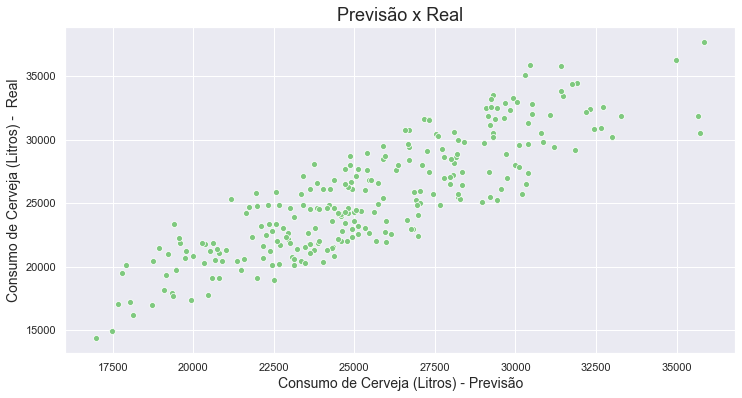

In [35]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (Litros) -  Real', fontsize=14)
ax;

## Obtendo os resíduos

In [44]:
residuo = y_train - y_previsto_train

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

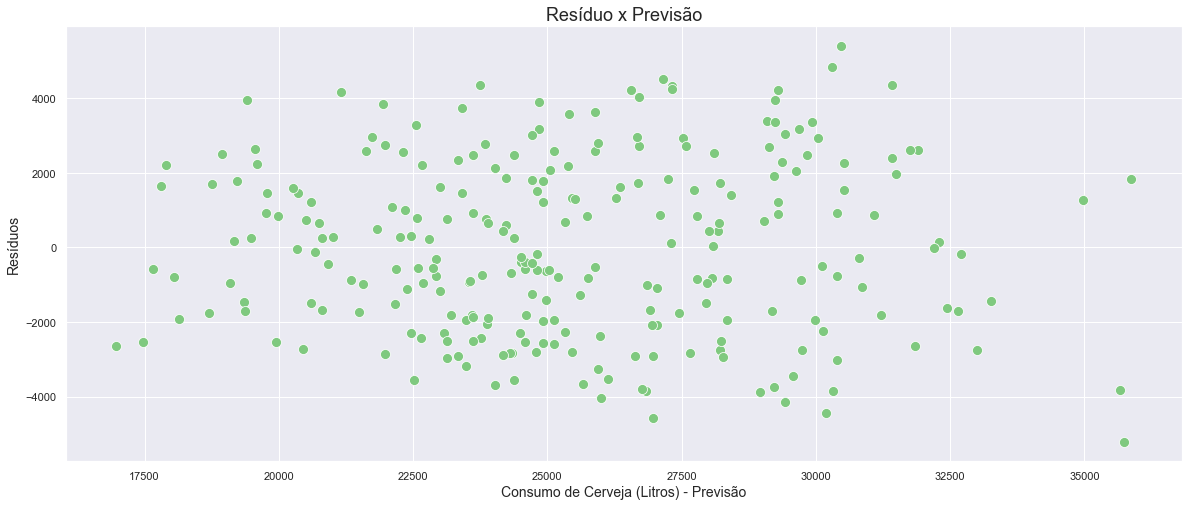

In [46]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=100)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduo x Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax;

## Plotando a distribuição de frequências dos resíduos

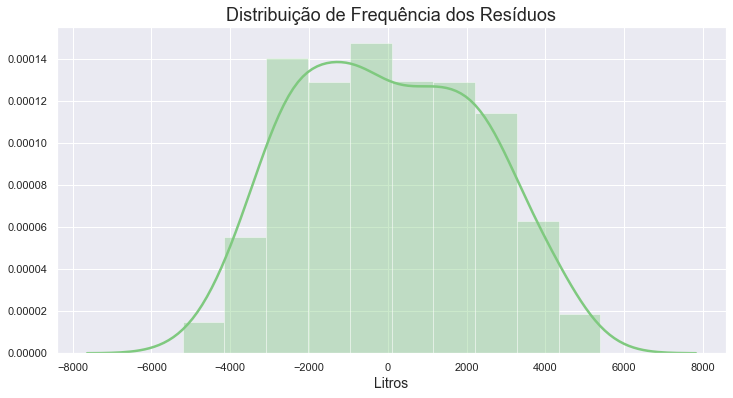

In [47]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax;